In [1]:
# Import libarieres 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read the data
train = pd.read_csv('train_agriculture.csv',skipinitialspace=True)
test = pd.read_csv('test_agriculture.csv',skipinitialspace=True)

In [3]:
# Check the train first five columns and it shape
train = train.drop('ID',axis=1)
display(train.head())
print(train.shape)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


(4599, 9)


In [4]:
# Check the test and its  shape
test = test.drop('ID',axis=1)
display(test.head())
print(test.shape)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


(1199, 8)


In [5]:
# Check the last five columns
train.tail()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
4594,2138,0,1,2,20,NaN,1,1,1
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0
4598,2267,0,1,2,10,33.0,17,2,0


In [6]:
# Check the missing values 
train.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [7]:
# Fill missing values
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(
train['Number_Weeks_Used'].dropna().mode().values[0] )

In [8]:
# Check the missng values after treating 
train.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

''' Missing vlaues removed.No missing values present in train data.
'''

In [9]:
# Check the info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4599 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


In [10]:
# Summary statistics
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.036530,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.249436,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [11]:
# Check the missing values 
test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [12]:
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(
test['Number_Weeks_Used'].dropna().mode().values[0] )

In [13]:
test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [14]:
# Remove data entries with missing value
train = train.dropna(axis=0, how='any')
test = test.dropna(axis=0, how='any')

# Show the results of the split
print("After removing the missing value:")
print("Training set has {} samples.".format(train.shape[0]))
print("Testing set has {} samples.".format(test.shape[0]))

After removing the missing value:
Training set has 4599 samples.
Testing set has 1199 samples.


In [15]:
# Combine the data
df = pd.concat([train,test])

In [16]:
# Check the shape 
display(df.head())
print(df.shape)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0.0
1,209,1,0,1,0,0.0,0,2,1.0
2,257,1,0,1,0,0.0,0,2,1.0
3,257,1,1,1,0,0.0,0,2,1.0
4,342,1,0,1,0,0.0,0,2,1.0


(5798, 9)


In [17]:
# Rename the columns
df = df.rename(columns={'Estimated_Insects_Count':'insects_count','Crop_Type':'crop_type','Soil_Type':'soil_type','Pesticide_Use_Category':'pesticide_category','Number_Doses_Week':'number_doses_week','Number_Weeks_Used':'number_weeks_used','Number_Weeks_Quit':'number_weeks_quit','Season':'season','Crop_Damage':'crop_damage'})
df.head()

,insects_count,crop_type,soil_type,pesticide_category,number_doses_week,number_weeks_used,number_weeks_quit,season,crop_damage
0,188,1,0,1,0,0.0,0,1,0.0
1,209,1,0,1,0,0.0,0,2,1.0
2,257,1,0,1,0,0.0,0,2,1.0
3,257,1,1,1,0,0.0,0,2,1.0
4,342,1,0,1,0,0.0,0,2,1.0


In [18]:
# Check the missing values
df.isnull().sum()

insects_count            0
crop_type                0
soil_type                0
pesticide_category       0
number_doses_week        0
number_weeks_used        0
number_weeks_quit        0
season                   0
crop_damage           1199
dtype: int64

In [19]:
# Fill the misssing values 
df['crop_damage'] = df['crop_damage'].fillna(
df['crop_damage'].dropna().mode().values[0] )

In [20]:
# Check the missing values
df.isnull().sum()

insects_count         0
crop_type             0
soil_type             0
pesticide_category    0
number_doses_week     0
number_weeks_used     0
number_weeks_quit     0
season                0
crop_damage           0
dtype: int64

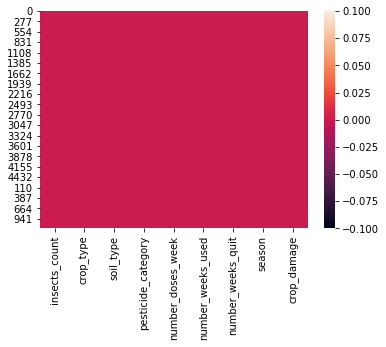

In [21]:
# Check trough the visualization
sns.heatmap(df.isnull())

In [22]:
# Check the summary statisitics
df.describe()

,insects_count,crop_type,soil_type,pesticide_category,number_doses_week,number_weeks_used,number_weeks_quit,season,crop_damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.057261,8.760262,1.891687,0.154191
std,821.330403,0.413280,0.499271,0.484594,15.655508,12.285552,9.582781,0.692997,0.412449
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,26.000000,6.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


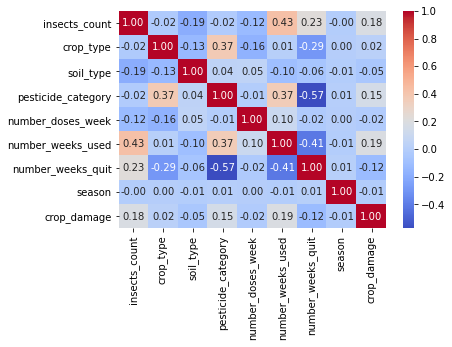

In [23]:
# Check the correaltion 
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [24]:
df.sample()

,insects_count,crop_type,soil_type,pesticide_category,number_doses_week,number_weeks_used,number_weeks_quit,season,crop_damage
3150,1478,1,0,3,25,41.0,0,2,0.0


In [25]:
# Check the skewness
df.skew()

insects_count         0.948378
crop_type             1.362628
soil_type             0.111273
pesticide_category    0.543183
number_doses_week     0.929452
number_weeks_used     0.422264
number_weeks_quit     0.972163
season                0.147252
crop_damage           2.721552
dtype: float64

In [26]:
#Treating skewness
num_col = train.dtypes[train.dtypes != 'object'].index

In [27]:
skew = ('crop_type','pesticide_category','number_doses_week','number_weeks_used','number_weeks_quit')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [28]:
# Check the skewness after treating 
df.skew()

insects_count         0.948378
crop_type             1.362628
soil_type             0.111273
pesticide_category    0.543183
number_doses_week    -1.263559
number_weeks_used     0.422264
number_weeks_quit    -0.117645
season                0.147252
crop_damage           2.721552
dtype: float64

In [29]:
# let's check the outliers
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(5798, 9)
(5566, 9)


In [30]:
# Seperating the target and input variables
X = df_final.drop(columns=['crop_damage'])
y = df_final['crop_damage']

# Machine Learning 

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [33]:
# Scaling the imput variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x = pd.DataFrame(x,columns=X.columns)

# K Neighbours Classifier 

In [34]:
knn_scores = []
for k in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

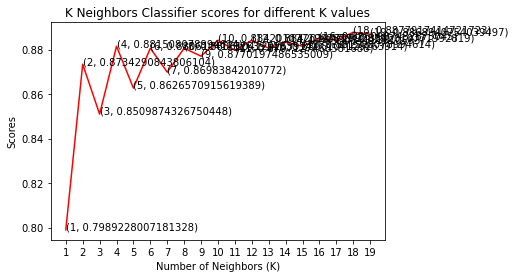

In [35]:
plt.plot([k for k in range(1, 20)], knn_scores, color = 'red')
for i in range(1,20):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

# SVM (Support Vector Machine)

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for svm = 0.889487870619946
Accuracy for test set for svm = 0.8886894075403949


# Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8881401617250674
Accuracy for test set for Logistic Regression = 0.8886894075403949


# Decision Tree Classifier

In [38]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 42)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

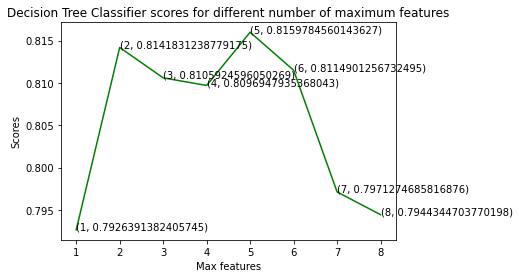

In [39]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 0.9984276729559748
Accuracy for test set for Decision Tree = 0.7881508078994613


# Random Forest 

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Random Forest = 0.9800089847259659
Accuracy for test set for Random Forest = 0.8671454219030521


# Conclusion
1)We can say that after checking the different alogrithm like SVM,K Neighbors , Decision Tree Classifer , Random Forest the best model is 'Random Forest'. 2) Because Random Foresta accuracy score of training and test set is really good compared to other models.

In [42]:
import joblib

# Save the model
joblib.dump(classifier,'agriculture.pkl')

['agriculture.pkl']